In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
# read in the data
df = pd.read_feather("../data/curated/taxi_add_weather_21.feather").drop('index', axis=1)

In [4]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["mean_temp"] = (df["Max_temp"]+df["Min_temp"])/2
abs(df.corr()["tip_amount"])

passenger_count    0.235269
trip_distance      0.595473
RatecodeID         0.494161
PULocationID       0.021897
DOLocationID       0.019962
fare_amount        0.604788
tip_amount         1.000000
total_amount       0.731418
airport_fee        0.416761
time_used          0.519105
avg_speed          0.353497
final_amount       0.733291
avg_wind_speed     0.019222
Rainfall           0.016903
SNOW               0.003107
Snow_depth         0.011611
Max_temp           0.013034
Min_temp           0.016843
Thunder            0.005423
WEEKDAY            0.024715
weekend            0.020852
hour               0.018621
mean_temp          0.015067
Name: tip_amount, dtype: float64

In [5]:
X = df[['trip_distance',"fare_amount","total_amount","time_used","avg_speed","avg_wind_speed","SNOW","mean_temp","WEEKDAY","hour"]]
Y = df[["tip_amount"]]

#Normalization
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [6]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 66)
#########MODEL
linearg = LinearRegression()
linearg.fit(x_train,y_train)
y_result = linearg.predict(x_test)

In [8]:
print(linearg.coef_)
print(linearg.intercept_)
# score the model
r2_score(y_test,y_result)

[[-1.81931667e+01 -4.58941744e+01  1.39692019e+02  7.86865146e+00
   3.72531169e+00 -6.11770947e-02  9.56105854e-03 -6.20353695e-02
   1.48911109e-01 -4.03830337e-01]]
[-1.53083334]


0.855992109678378

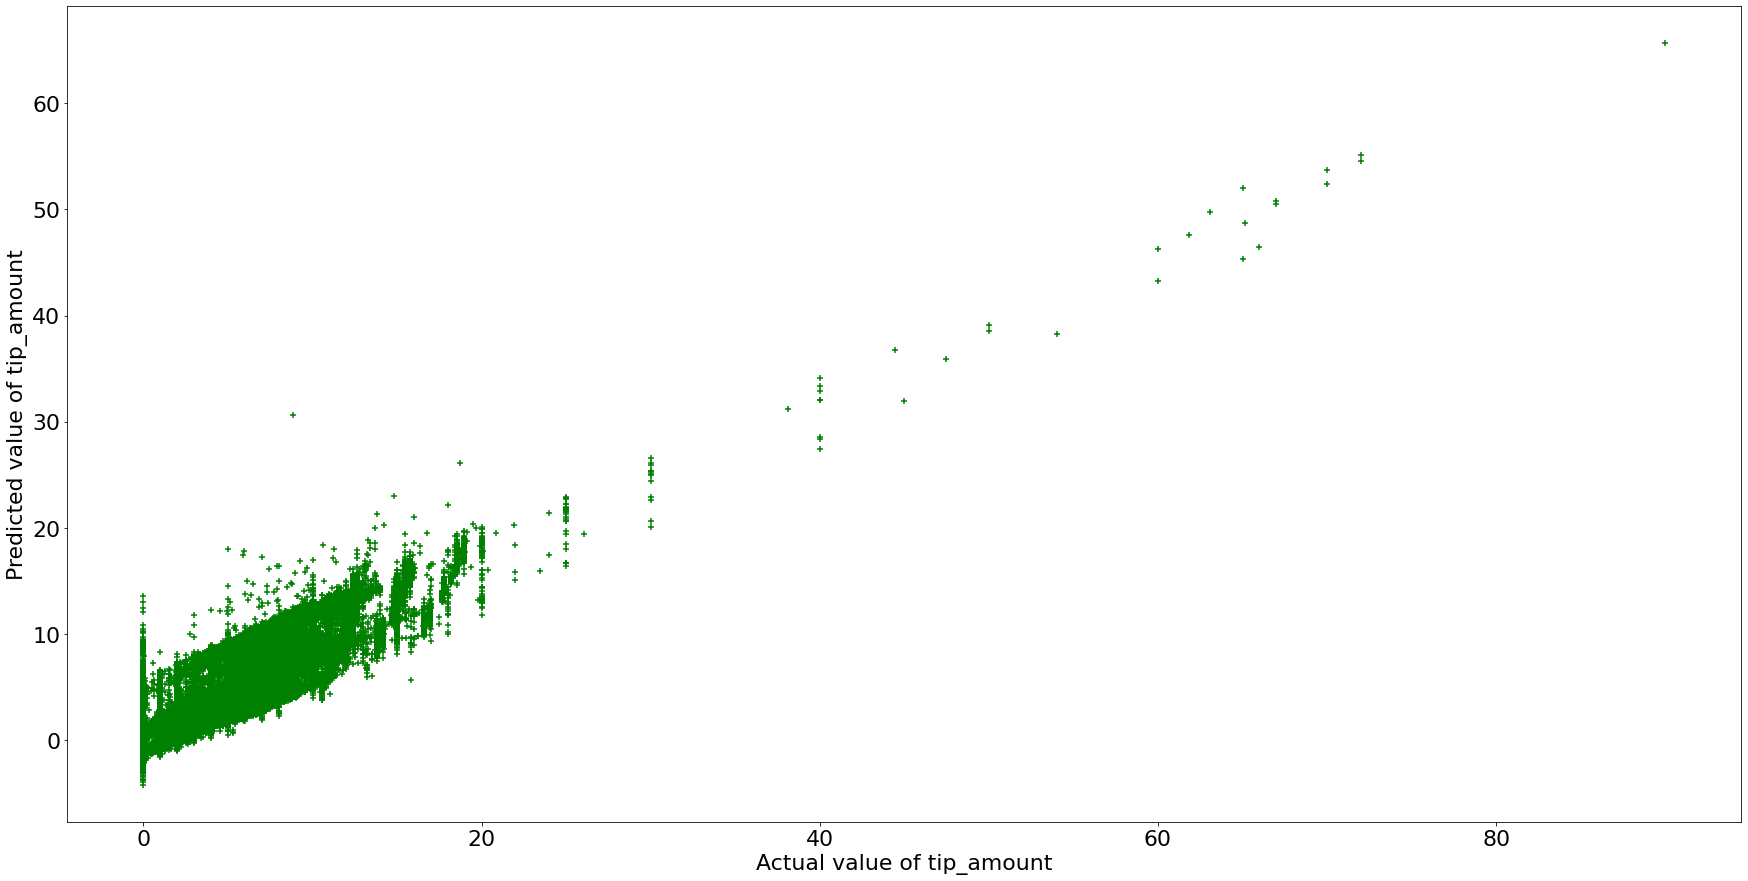

In [13]:
plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size': 22})
plt.scatter(y_test,y_result, marker='+', c='g')
plt.xlabel("Actual value of tip_amount")
plt.ylabel("Predicted value of tip_amount")
plt.show()

# SVM MODEL

In [1]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np


from sklearn import preprocessing
from sklearn.metrics import r2_score
# read in the data
df = pd.read_feather("/home/wbc/projects/datascience/MAST30034_PJ1/preprocessed_data/taxi_add_weather_21.feather").drop('index', axis=1)

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["mean_temp"] = (df["Max_temp"]+df["Min_temp"])/2
abs(df.corr()["tip_amount"])

X = df[['trip_distance',"fare_amount","total_amount","time_used","avg_speed","avg_wind_speed","SNOW","mean_temp","WEEKDAY","hour"]]
Y = df[["tip_amount"]]



#Normalization
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)


#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 66)

In [2]:
svrlinearg = SVR()

In [3]:
svrlinearg.fit(x_train,y_train.values.ravel())
y_result = svrlinearg.predict(x_test)

In [4]:
y_result = clf.predict(x_test)
r2_score(y_test)